In [4]:
pip install torch torchvision transformers clip-by-openai

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached torchvision-0.19.1-cp311-cp311-manylinux1_x86_64.whl.metadata (6.0 kB)
  Using cached torch-2.4.1-cp311-cp311-manylinux1_x86_64.whl.metadata (26 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvisi

In [31]:
from PIL import Image
import requests
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from transformers import CLIPProcessor, CLIPModel
import seaborn as sns

In [25]:


model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


/home/tphuawir/.local/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Example parameters
img_dir = os.path.join(HOME, 'sample')  # Replace with your image directory
img = os.listdir(img_dir)  # List of image files


In [26]:
data = dict()
labels = []
for idx, filename in enumerate(img):
    if filename.endswith((".jpg", ".png")):  # Only process image files
        image = Image.open(os.path.join(img_dir, filename))
        name = os.path.splitext(filename)[0].lower().strip().replace("_", "").replace("-", "")
        data[filename] = name
        labels.append(name)
        
print(data)
        

{'Majezik.jpg': 'majezik', 'HametanMerhem.jpg': 'hametanmerhem', 'unisom.jpg': 'unisom', 'aferin.jpg': 'aferin', 'Dolorex.jpg': 'dolorex', 'hametanKrem.jpg': 'hametankrem', 'Dikloron.jpg': 'dikloron', 'Metpamid.jpg': 'metpamid', 'Terbisil.jpg': 'terbisil', 'Apranax.jpg': 'apranax', 'Parol.jpg': 'parol'}


In [39]:
true_labels = []
pred_labels = []

for image_path, true_label in data.items():
    image = Image.open(image_path)

    # Preprocess image and tokenize text labels
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

    # Get predictions
    with torch.no_grad():
        outputs = model(**inputs)
        probs = outputs.logits_per_image.softmax(dim=1)  # Convert to probabilities

    # Get predicted label
    predicted_label = labels[probs.argmax().item()]
    
    true_labels.append(true_label)
    pred_labels.append(predicted_label)

    print(f"Image: {image_path} | True: {true_label} | Predicted: {predicted_label}")


Image: Majezik.jpg | True: majezik | Predicted: majezik
Image: HametanMerhem.jpg | True: hametanmerhem | Predicted: hametankrem
Image: unisom.jpg | True: unisom | Predicted: unisom
Image: aferin.jpg | True: aferin | Predicted: aferin
Image: Dolorex.jpg | True: dolorex | Predicted: dolorex
Image: hametanKrem.jpg | True: hametankrem | Predicted: hametankrem
Image: Dikloron.jpg | True: dikloron | Predicted: dikloron
Image: Metpamid.jpg | True: metpamid | Predicted: metpamid
Image: Terbisil.jpg | True: terbisil | Predicted: terbisil
Image: Apranax.jpg | True: apranax | Predicted: apranax
Image: Parol.jpg | True: parol | Predicted: parol


Total number of images: 11
Image: Majezik.jpg | True: majezik | Predicted: majezik
Image: HametanMerhem.jpg | True: hametanmerhem | Predicted: hametankrem
Image: unisom.jpg | True: unisom | Predicted: unisom
Image: aferin.jpg | True: aferin | Predicted: aferin
Image: Dolorex.jpg | True: dolorex | Predicted: dolorex
Image: hametanKrem.jpg | True: hametankrem | Predicted: hametankrem
Image: Dikloron.jpg | True: dikloron | Predicted: dikloron
Image: Metpamid.jpg | True: metpamid | Predicted: metpamid
Image: Terbisil.jpg | True: terbisil | Predicted: terbisil
Image: Apranax.jpg | True: apranax | Predicted: apranax
Image: Parol.jpg | True: parol | Predicted: parol


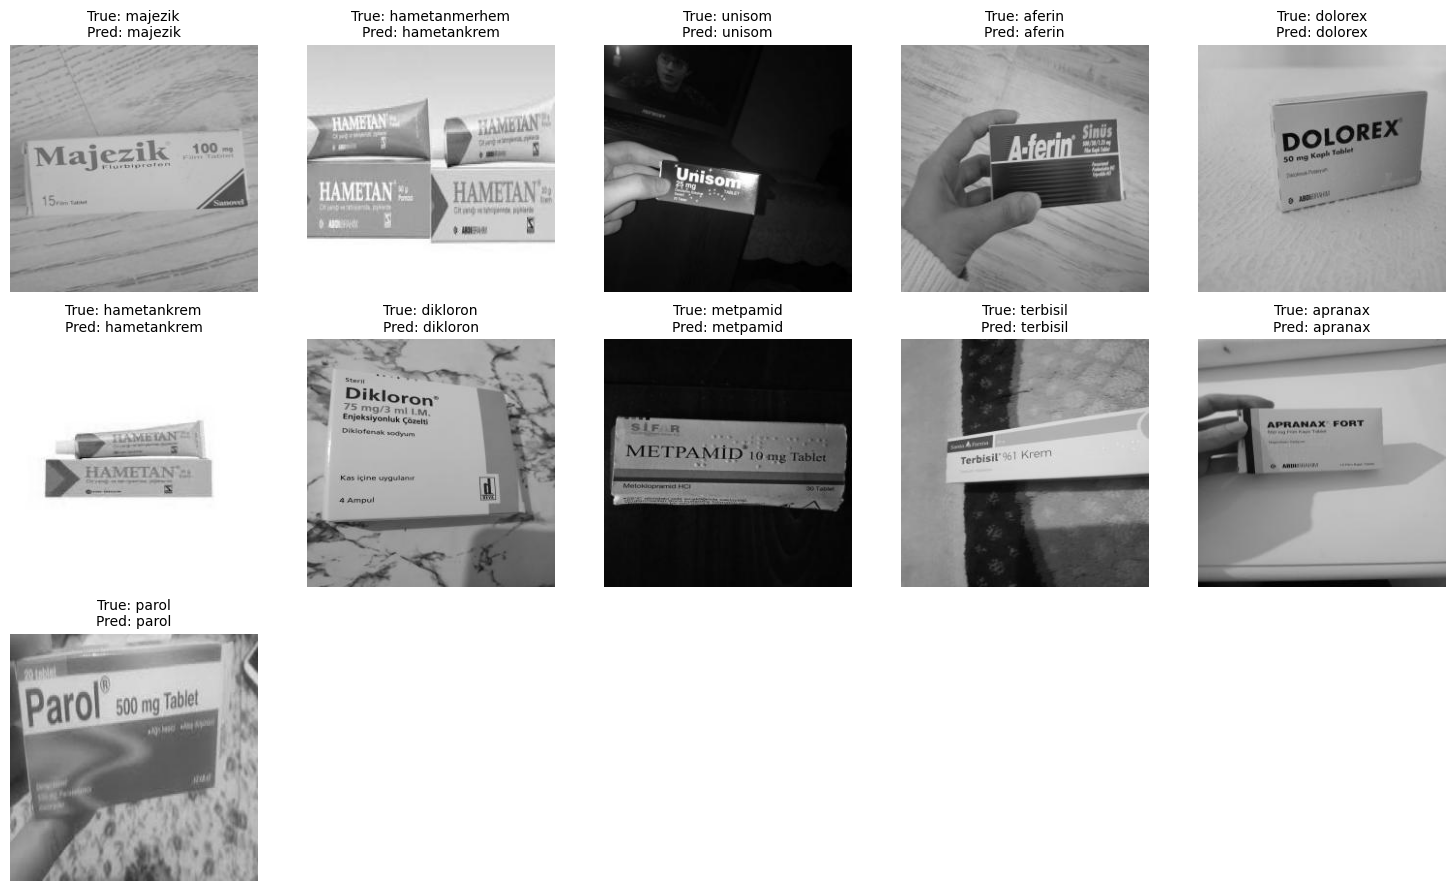

In [40]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch

# Ensure 'image_class_dict' exists and contains {image_path: class_name} pairs
true_labels = []
pred_labels = []
labels = list(set(labels))  # Ensure labels contain unique classes

# Set number of images per row
images_per_row = 5
total_images = len(data)

# Print total number of images to verify
print(f"Total number of images: {total_images}")

# Determine the number of rows
rows = (total_images // images_per_row) + (total_images % images_per_row > 0)

# Set figure size
plt.figure(figsize=(15, 3 * rows))

# Iterate through all images
for idx, (image_path, true_label) in enumerate(data.items()):
    # print(img_path)
    # img_path = os.path.join(HOME, 'sample')
    
    try:
        image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB format

        # Preprocess image and tokenize text labels
        inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

        # Get predictions
        with torch.no_grad():
            outputs = model(**inputs)
            probs = outputs.logits_per_image.softmax(dim=1)  # Convert to probabilities

        # Get predicted label
        predicted_label = labels[probs.argmax().item()]

        true_labels.append(true_label)
        pred_labels.append(predicted_label)

        # Plot the image
        plt.subplot(rows, images_per_row, idx + 1)
        plt.imshow(image)
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
        plt.axis('off')  # Hide axis

        # Print for debugging
        print(f"Image: {image_path} | True: {true_label} | Predicted: {predicted_label}")

    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [41]:
# Compute accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Zero-Shot CLIP Accuracy: {accuracy:.2f}")

# Generate classification report
print(classification_report(true_labels, pred_labels, target_names=labels))


Zero-Shot CLIP Accuracy: 0.91
               precision    recall  f1-score   support

     metpamid       1.00      1.00      1.00         1
      majezik       1.00      1.00      1.00         1
hametanmerhem       1.00      1.00      1.00         1
      dolorex       1.00      1.00      1.00         1
  hametankrem       0.50      1.00      0.67         1
     terbisil       0.00      0.00      0.00         1
       aferin       1.00      1.00      1.00         1
     dikloron       1.00      1.00      1.00         1
      apranax       1.00      1.00      1.00         1
        parol       1.00      1.00      1.00         1
       unisom       1.00      1.00      1.00         1

     accuracy                           0.91        11
    macro avg       0.86      0.91      0.88        11
 weighted avg       0.86      0.91      0.88        11



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


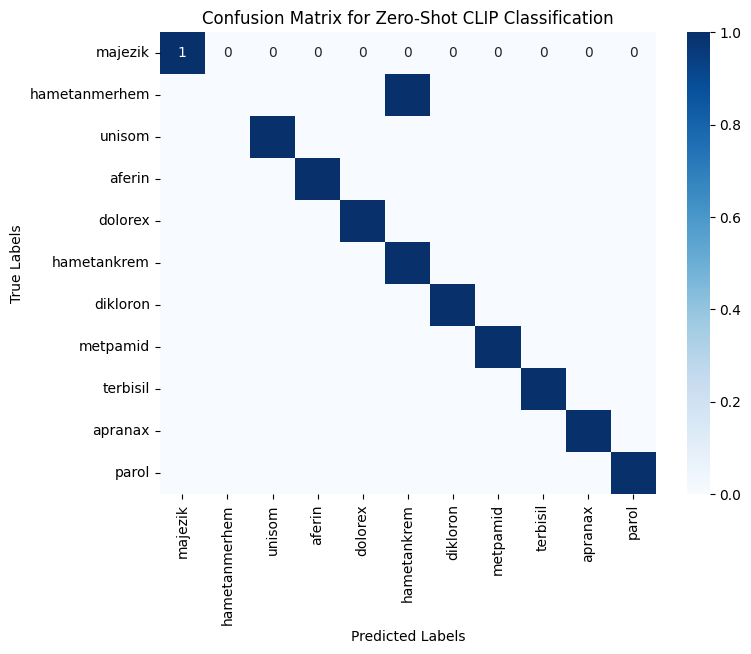

In [32]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Zero-Shot CLIP Classification")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()